In [270]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

#參考文章：https://www.kaggle.com/nishimoto/very-simple-linear-models-pls

In [271]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [272]:
train = pd.read_csv('train_new.csv')
test = pd.read_csv('test.csv')
testID = test['id']

#data = pd.concat([train.drop('SalePrice', axis=1), test], keys=['train', 'test'])
#data.drop(['Id'], axis=1, inplace=True)
#df_all = pd.concat([train.drop('SalePrice', axis=1), test], keys=['train', 'test'])
#df_all.drop(['Id'], axis=1, inplace=True)

In [273]:
#瞭解資料型別
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 60 columns):
Id                    7160 non-null object
appearedTimeOfDay     7160 non-null object
terrainType           7160 non-null int64
closeToWater          7160 non-null bool
city                  7160 non-null object
continent             7160 non-null object
weather               7160 non-null object
temperature           7160 non-null float64
windSpeed             7160 non-null float64
pressure              7160 non-null float64
weatherIcon           7160 non-null object
population_density    7160 non-null float64
urban                 7160 non-null bool
suburban              7160 non-null bool
midurban              7160 non-null bool
rural                 7160 non-null bool
gymDistanceKm         7160 non-null float64
gymIn100m             7160 non-null bool
gymIn250m             7160 non-null bool
gymIn500m             7160 non-null bool
gymIn1000m            7160 non-null bool
gymI

In [274]:
#train.corr('kendall')

In [275]:
# 描述data物件型態的統計資訊（個數、種類、出現頻率最高的種類及其次數）
print(f"categorical features: {train.describe(include='O').shape}")
# 查詢非數值資訊
train.describe(include="O")

categorical features: (4, 6)


,Id,appearedTimeOfDay,city,continent,weather,weatherIcon
count,7160,7160,7160,7160,7160,7160
unique,7160,4,73,8,24,8
top,MTM5MDIwNzUzNDkxODQ4OTc5NDk=,night,New_York,America,Clear,clear-day
freq,1,3781,1387,4029,4319,2263


## EDA (Drop Outlier)

In [276]:
# 描述data數值型態的統計資訊（個數、平均、標準差、最小值、
#                           第一四分位數、第二四分位數、第三四分位數
#                           、最大值）
     
# 瞭解資料的分佈情況
train.describe()

,terrainType,temperature,windSpeed,pressure,population_density,gymDistanceKm,pokestopDistanceKm,class
count,7160.00000,7160.000000,7160.000000,7160.000000,7160.000000,7160.000000,7160.000000,7160.000000
mean,9.76676,23.276257,7.536071,1014.900068,1532.785042,2.849919,0.468334,2.374581
std,4.90665,6.042675,4.622314,5.845140,2216.693146,50.348234,3.319317,1.806051
min,0.00000,4.800000,0.000000,996.330000,0.000000,0.004516,0.000319,0.000000
25%,7.00000,18.500000,3.930000,1010.660000,86.498360,0.177619,0.050233,1.000000
50%,13.00000,23.800000,6.650000,1015.290000,635.549800,0.309457,0.131560,2.000000
75%,13.00000,27.500000,9.990000,1019.320000,1955.863600,0.576796,0.305844,4.000000
max,16.00000,41.200000,56.130000,1034.170000,10000.000000,3859.424664,199.829897,5.000000


In [277]:
## EDA (Drop Outlier)

In [278]:
train.shape

(7160, 60)

In [279]:
# It helps to drop outliers for relevant features
# 相關係數
# decision tree找出重要的feature或xbost
# PCA䧏維度
# dnn的autoencoding來降維

#plt.plot(train.GrLivArea, train.SalePrice, '.' )
#plt.xlabel('GrLivArea')
#plt.ylabel('SalePrice')
#print( train[ train.GrLivArea > 4000 ].SalePrice ) #中刮號放條件

In [280]:
# 一些右偏分佈的 feature，可透過取 log 將其轉為常態分佈
#sns.distplot(np.log(train.class))

In [281]:
#scatterplot
# 畫出散狀圖, 'GarageCars', 'TotalBsmtSF', 'FullBath', 'OverallQual',
#sns.set()
#cols = ['SalePrice', 'GrLivArea' , 'YearBuilt']
#sns.pairplot(train[cols], size = 5)
#plt.show();

In [282]:
#取得數值型態的欄位
#取得數值型態欄位
numeric_data = train._get_numeric_data()
numeric_data.columns

Index(['terrainType', 'closeToWater', 'temperature', 'windSpeed', 'pressure',
       'population_density', 'urban', 'suburban', 'midurban', 'rural',
       'gymDistanceKm', 'gymIn100m', 'gymIn250m', 'gymIn500m', 'gymIn1000m',
       'gymIn2500m', 'gymIn5000m', 'pokestopDistanceKm', 'pokestopIn100m',
       'pokestopIn250m', 'pokestopIn500m', 'pokestopIn1000m',
       'pokestopIn2500m', 'pokestopIn5000m', 'cooc_1', 'cooc_2', 'cooc_3',
       'cooc_4', 'cooc_5', 'cooc_6', 'cooc_7', 'cooc_8', 'cooc_9', 'cooc_10',
       'cooc_11', 'cooc_12', 'cooc_13', 'cooc_14', 'cooc_15', 'cooc_16',
       'cooc_17', 'cooc_18', 'cooc_19', 'cooc_20', 'cooc_21', 'cooc_22',
       'cooc_23', 'cooc_24', 'cooc_25', 'cooc_26', 'cooc_27', 'cooc_28',
       'cooc_29', 'class'],
      dtype='object')

## sketch pics


## Drop Null Feature(s)

In [283]:
#df_all = pd.concat( [ train.drop( [ 'Id', 'SalePrice' ], axis = 1 ),
#                      test.drop( [ 'Id' ], axis = 1 ) ],
#                      axis = 0, ignore_index = False )
#train.drop_duplicates(keep='first', inplace=False) 
#test.drop_duplicates(keep='first', inplace=False) 
#train_data=train.drop('class', axis=1)
df_all = pd.concat([train, test], keys=['train', 'test'], sort=True)

In [284]:
df_all.drop(['Id'], axis=1, inplace=True)
df_all.drop(['id'], axis=1, inplace=True)
df_all.drop(['city'],axis=1,inplace=True)
df_all.drop(['appearedHour'], axis=1, inplace=True)
df_all.drop(['appearedMinute'], axis=1, inplace=True)

In [285]:
# check null status
print( df_all.shape )
df_na = df_all.select_dtypes( exclude = [ 'object' ] ).isnull().sum()
print( df_na[ df_na > 100 ].sort_values(ascending=False) )

(8951, 180)
class    1791
dtype: int64


In [286]:
#train = train.drop( labels = train[ train['class'].isna().any() ].index, axis = 0 )

In [287]:
df_all['class'] = df_all['class'].apply(str)

In [288]:





def FunctionalToInt(x):
    if(x==False):
        r = 0
    else:
        r = 1
    return r

df_all['closeToWater'] = df_all['closeToWater'].apply(FunctionalToInt)
df_all['urban'] = df_all['urban'].apply(FunctionalToInt)
df_all['suburban'] = df_all['suburban'].apply(FunctionalToInt)
df_all['midurban'] = df_all['midurban'].apply(FunctionalToInt)
df_all['rural'] = df_all['rural'].apply(FunctionalToInt)
df_all['gymIn100m'] = df_all['gymIn100m'].apply(FunctionalToInt)
df_all['gymIn250m'] = df_all['gymIn250m'].apply(FunctionalToInt)
df_all['gymIn500m'] = df_all['gymIn500m'].apply(FunctionalToInt)
df_all['gymIn1000m'] = df_all['gymIn1000m'].apply(FunctionalToInt)
df_all['gymIn2500m'] = df_all['gymIn2500m'].apply(FunctionalToInt)
df_all['gymIn5000m'] = df_all['gymIn5000m'].apply(FunctionalToInt)
df_all['pokestopIn100m'] = df_all['pokestopIn100m'].apply(FunctionalToInt)
df_all['pokestopIn250m'] = df_all['pokestopIn250m'].apply(FunctionalToInt)
df_all['pokestopIn500m'] = df_all['pokestopIn500m'].apply(FunctionalToInt)
df_all['pokestopIn1000m'] = df_all['pokestopIn1000m'].apply(FunctionalToInt)

df_all['pokestopIn2500m'] = df_all['pokestopIn2500m'].apply(FunctionalToInt)
df_all['pokestopIn5000m'] = df_all['pokestopIn5000m'].apply(FunctionalToInt)


for num in range(1,152):
    df_all['cooc_'+str(num)] = df_all['cooc_'+str(num)].apply(FunctionalToInt)



def FunctionalToDay(x):
    if(x=='morning'):
        r = 0
    elif(x=='afternoon'):
        r = 1
    elif(x=='evening'):
        r = 2
    elif(x=='night'):
        r = 3
    else:
        r = 4
    return r

df_all['appearedTimeOfDay'] = df_all['appearedTimeOfDay'].apply(FunctionalToDay)


def FunctionalToWeather(x):
    if(x=='Clear'):
        r = 0
    elif(x=='PartlyCloudy'):
        r = 1
    elif(x=='Overcast'):
        r = 2
    elif(x=='MostlyCloudy'):
        r = 3
    elif(x=='PartlyCloudy'):
        r = 4
    elif(x=='BreezyandPartlyCloudy'):
        r = 5
    elif(x=='Dry'):
        r = 6
    elif(x=='LightRain'):
        r = 7
    elif(x=='Rain'):
        r = 8
    else:
        r = 9
    return r

df_all['weather'] = df_all['weather'].apply(FunctionalToWeather)



def FunctionalToDay(x):
    if(x=='morning'):
        r = 0
    elif(x=='afternoon'):
        r = 1
    elif(x=='evening'):
        r = 2
    elif(x=='night'):
        r = 3
    else:
        r = 4
    return r

df_all['weatherIcon'] = df_all['weather'].apply(FunctionalToWeather)


def FunctionalToClss(x):
    #print(x)
    if(x=='0.0'):
        r = '0'
    elif(x=='1.0'):
        r = '1'
    elif(x=='2.0'):
        r = '2'
    elif(x=='3.0'):
        r = '3'
    elif(x=='4.0'):
        r = '4'
    elif(x=='5.0'):
        r = '5'
    elif(x=='6.0'):
        r = '6'
    else:
        r = '7'
    return r

df_all['class'] = df_all['class'].apply(FunctionalToClss)

def FunctionalToLocation(x):
    if(x=='Asia'):
        r = 0
    elif(x=='America'):
        r = 1
    elif(x=='America/Argentina'):
        r = 2
    elif(x=='Europe'):
        r = 3
    elif(x=='Pacific'):
        r = 4
    elif(x=='Africa'):
        r = 5
    else:
        r = 6
    return r

df_all['continent'] = df_all['continent'].apply(FunctionalToLocation)




In [289]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8951 entries, (train, 0) to (test, 1790)
Columns: 180 entries, appearedTimeOfDay to windSpeed
dtypes: float64(6), int64(173), object(1)
memory usage: 12.4+ MB


## Numerical to Categorical

In [290]:
# handle skewness
#train.SalePrice = np.log( train['class'] )
# exclude object型態的欄位
#num_feats = df_all.select_dtypes( exclude = [ 'object' ] ).columns
# na drop should be done series by series
# apply function>>幫助我們算出偏差系數
#skewed_feats = df_all[ num_feats ].apply( func = lambda s: skew(s.dropna()), axis = 0 )
#print(skewed_feats)
# 選出dataframe大於0.75的人
#skewed_feats = skewed_feats[ skewed_feats > 0.75 ].index
# print(skewed_feats)
# 把大於0.75的要作正規化，變成常態分配
# np.log1p是log(1+x), 若直接取log會有log0的問題
#df_all[ skewed_feats ] = np.log1p( df_all[ skewed_feats ] )



In [291]:
df_all.describe(include = "O")

,class
count,8951
unique,7
top,7
freq,1791


In [292]:
#df_all['class']
df_all.head()

appearedTimeOfDay class  closeToWater  continent  cooc_1  cooc_10  \
train 0                  2     2             0          0       0        1   
      1                  3     5             1          1       0        0   
      2                  2     3             1          1       0        0   
      3                  0     4             1          6       0        0   
      4                  2     3             1          1       0        0   

         cooc_100  cooc_101  cooc_102  cooc_103    ...      \
train 0         1         1         1         1    ...       
      1         1         1         1         1    ...       
      2         1         1         1         1    ...       
      3         1         1         1         1    ...       
      4         1         1         1         1    ...       

         population_density  pressure  rural  suburban  temperature  \
train 0          6019.04440   1008.96      0         1         27.8   
      1             0.00000   1018.96      1         0         26.1   
      2             0.00000   1023.22      1         0         24.7   
      3           128.89505   1014.19      1         0         12.7   
      4          4188.39100   1011.36      0         1         19.1   

         terrainType  urban  weather  weatherIcon  windSpeed  
train 0           13      1        0            9       9.00  
      1           13      0        0            9       8.70  
      2            0      0        0            9      16.82  
      3            0      0        0            9      13.25  
      4           13      1        1            9       5.78  

[5 rows x 180 columns]

## One-Hot Encoding

In [293]:
#df_all_dum = pd.get_dummies(df_all); 
df_all_dum=df_all;
df_all_dum.head()

appearedTimeOfDay class  closeToWater  continent  cooc_1  cooc_10  \
train 0                  2     2             0          0       0        1   
      1                  3     5             1          1       0        0   
      2                  2     3             1          1       0        0   
      3                  0     4             1          6       0        0   
      4                  2     3             1          1       0        0   

         cooc_100  cooc_101  cooc_102  cooc_103    ...      \
train 0         1         1         1         1    ...       
      1         1         1         1         1    ...       
      2         1         1         1         1    ...       
      3         1         1         1         1    ...       
      4         1         1         1         1    ...       

         population_density  pressure  rural  suburban  temperature  \
train 0          6019.04440   1008.96      0         1         27.8   
      1             0.00000   1018.96      1         0         26.1   
      2             0.00000   1023.22      1         0         24.7   
      3           128.89505   1014.19      1         0         12.7   
      4          4188.39100   1011.36      0         1         19.1   

         terrainType  urban  weather  weatherIcon  windSpeed  
train 0           13      1        0            9       9.00  
      1           13      0        0            9       8.70  
      2            0      0        0            9      16.82  
      3            0      0        0            9      13.25  
      4           13      1        1            9       5.78  

[5 rows x 180 columns]

In [294]:
# 將NA的值填平均值
df_all_dum = df_all_dum.fillna( df_all_dum.mean() ); df_all_dum.head()

appearedTimeOfDay class  closeToWater  continent  cooc_1  cooc_10  \
train 0                  2     2             0          0       0        1   
      1                  3     5             1          1       0        0   
      2                  2     3             1          1       0        0   
      3                  0     4             1          6       0        0   
      4                  2     3             1          1       0        0   

         cooc_100  cooc_101  cooc_102  cooc_103    ...      \
train 0         1         1         1         1    ...       
      1         1         1         1         1    ...       
      2         1         1         1         1    ...       
      3         1         1         1         1    ...       
      4         1         1         1         1    ...       

         population_density  pressure  rural  suburban  temperature  \
train 0          6019.04440   1008.96      0         1         27.8   
      1             0.00000   1018.96      1         0         26.1   
      2             0.00000   1023.22      1         0         24.7   
      3           128.89505   1014.19      1         0         12.7   
      4          4188.39100   1011.36      0         1         19.1   

         terrainType  urban  weather  weatherIcon  windSpeed  
train 0           13      1        0            9       9.00  
      1           13      0        0            9       8.70  
      2            0      0        0            9      16.82  
      3            0      0        0            9      13.25  
      4           13      1        1            9       5.78  

[5 rows x 180 columns]

In [295]:
#from sklearn.preprocessing import LabelEncoder
#cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
#        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
#        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
#        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
#        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
#for c in cols:
#    lbl = LabelEncoder() 
#    lbl.fit(list(df_all[c].values)) 
#    df_all[c] = lbl.transform(list(df_all[c].values))

# shape        
print('Shape all_data: {}'.format(df_all.shape))

Shape all_data: (8951, 180)


In [296]:
df_all_dum.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8951 entries, (train, 0) to (test, 1790)
Columns: 180 entries, appearedTimeOfDay to windSpeed
dtypes: float64(6), int64(173), object(1)
memory usage: 12.4+ MB


In [297]:
## Standardization

## Standardization

In [298]:
# normalization helps a bit
from sklearn import preprocessing

#num_feats = df_all_dum.select_dtypes( exclude = [ 'object' ] ).columns
#df_all_dum[ num_feats ] = preprocessing.scale( df_all_dum[ num_feats ] )
#df_all_dum[ num_feats ].head()

In [299]:
#np.any(np.isnan(df_all_dum))
df_all_dum.columns[df_all_dum.isna().any()].tolist()

[]

In [300]:
# 查詢是否有重複的欄位
df_all_dum.columns[df_all_dum.columns.duplicated()]

Index([], dtype='object')

## Training Start

In [301]:
# inputs
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import rcParams
X = df_all_dum[:train.shape[0]]
y = train['class']
#把train data與test分開
X, X_val, y, y_val = train_test_split(X, y, test_size = 0.1, random_state = 40)

X_test = df_all_dum[ train.shape[0]: ]

In [302]:
#X.info
from sklearn import tree
# 建立分類器
#clf = tree.DecisionTreeClassifier()
#iris_clf = clf.fit(X, y)

# 預測
#test_y_predicted = iris_clf.predict(X_test)

#print(iris_clf)

In [303]:
# 績效
#accuracy = metrics.accuracy_score(y_val, val_preds)
print(y)

970     5
4364    0
5793    5
2851    5
5883    3
3133    2
3368    0
3719    1
3506    0
467     2
686     3
7048    5
6834    2
2357    4
3872    1
3221    5
1191    5
1907    1
5220    3
5938    0
4996    1
435     2
6866    5
848     2
6564    0
5849    0
412     5
172     2
375     4
3469    0
       ..
3803    2
6275    2
5142    5
5834    0
4794    5
3688    5
500     0
860     3
1231    3
3742    0
3080    1
5449    5
1717    0
3889    3
3808    2
2121    5
3163    0
443     2
2103    2
6986    3
3603    5
4722    2
5959    3
3340    4
5426    5
3064    5
6309    0
6151    2
6363    1
3398    5
Name: class, Length: 6444, dtype: int64


## LassoCV

In [304]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring = "neg_mean_squared_error", cv = 5))
    return(rmse)

In [305]:
from sklearn.linear_model import LassoCV
model_Lasso = LassoCV( alphas = [ 1, 0.1, 0.01, 0.001, 0.0005, 0.0004, 0.0003, 0.0002 ],
                       max_iter = 2000 ).fit( X, y )
print( rmse_cv( model_Lasso ), model_Lasso.alpha_ )

[0.00011501 0.0001143  0.00011462 0.00013559 0.00011867] 0.0002


In [306]:
coef = pd.Series( model_Lasso.coef_, index = X.columns )
print( sum(coef != 0), sum(coef == 0))

2 178


Text(0.5, 1.0, 'Coefficients in Model Lasso')

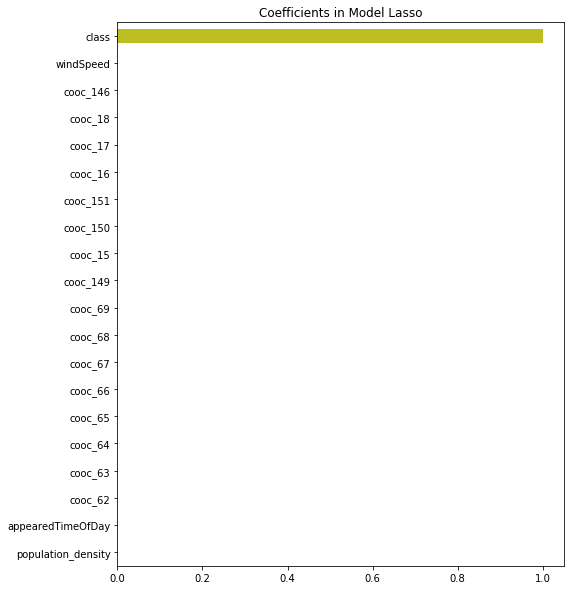

In [307]:
important_coef = pd.concat( [coef.sort_values().head(10), coef.sort_values().tail(10)] )
rcParams['figure.figsize'] = (8.0, 10.0)
important_coef.plot(kind = 'barh')
plt.title('Coefficients in Model Lasso')

In [308]:
from sklearn import metrics
preds = model_Lasso.predict(X)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, preds)))
print('  R2:', metrics.r2_score( y, preds ) )

In [313]:
preds

array([4.99983335e+00, 1.50645117e-04, 4.99983406e+00, ...,
       2.00002406e+00, 1.00008752e+00, 4.99983375e+00])

In [309]:
val_preds = model_Lasso.predict(X_val)
print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
print('  R2:', metrics.r2_score( y_val, val_preds ) )

In [322]:
X_test

appearedTimeOfDay class  closeToWater  continent  cooc_1  cooc_10  \
test 0                     0     7             0          3       0        0   
     1                     3     7             1          1       0        0   
     2                     3     7             1          1       0        0   
     3                     0     7             1          3       0        0   
     4                     3     7             0          1       0        0   
     5                     3     7             1          1       0        0   
     6                     0     7             1          1       0        0   
     7                     1     7             1          1       0        0   
     8                     1     7             0          3       0        0   
     9                     3     7             1          1       0        0   
     10                    0     7             0          6       0        0   
     11                    3     7             1          3       0        0   
     12                    1     7             1          1       0        0   
     13                    1     7             1          3       0        1   
     14                    3     7             0          1       0        0   
     15                    0     7             1          3       0        0   
     16                    3     7             1          1       0        0   
     17                    1     7             1          3       0        0   
     18                    0     7             0          1       0        0   
     19                    3     7             0          2       0        0   
     20                    3     7             0          1       0        0   
     21                    3     7             0          1       0        0   
     22                    0     7             0          1       0        0   
     23                    2     7             1          3       0        0   
     24                    1     7             1          3       0        0   
     25                    3     7             1          3       0        0   
     26                    0     7             1          0       0        0   
     27                    0     7             0          3       0        0   
     28                    3     7             0          3       0        0   
     29                    3     7             0          1       0        0   
...                      ...   ...           ...        ...     ...      ...   
     1761                  1     7             0          3       0        0   
     1762                  3     7             0          0       0        0   
     1763                  1     7             0          0       0        0   
     1764                  3     7             1          1       0        0   
     1765                  2     7             1          0       0        0   
     1766                  2     7             0          1       0        0   
     1767                  3     7             0          1       0        0   
     1768                  3     7             0          3       0        0   
     1769                  1     7             1          3       0        0   
     1770                  3     7             1          1       0        0   
     1771                  1     7             1          3       0        0   
     1772                  3     7             0          1       0        0   
     1773                  3     7             0          1       0        0   
     1774                  3     7             1          1       0        0   
     1775                  3     7             1          1       0        0   
     1776                  3     7             1          1       0        0   
     1777                  0     7             0          3       0        0   
     1778                  0     7             1          3       0        0   
     1779  

In [323]:
y_answer_Lasso = model_Lasso.predict( X_test )
#y_answer_Lasso = np.exp(y_answer_Lasso)
# print(pd.DataFrame(data=y_answer, columns=['SalePrice'], index=X_test.index).head())
print(pd.DataFrame({'class': y_answer_Lasso}, index=test.id).head())

                                 class
id                                    
MTA5MTEwOTYxMzM0NzA2NDEzNzM=  6.999707
MTY0OTUyMTM2MDExMjg3MjczMjU=  6.999706
MTQ0ODU1OTEzOTU1NTAyNzI4NjE=  6.999707
MTY1ODg1MzEwNzYzNDUzMDUwNTM=  6.999707
MTY0NTg2OTA5MTkzOTE2MTc1MTc=  6.999707


In [324]:
y_answer_Lasso

array([6.99970697, 6.99970626, 6.9997074 , ..., 6.9997074 , 6.99970735,
       6.99970571])

In [318]:
pd.DataFrame({'class': y_answer_Lasso}, index=test.id).to_csv('submission_Lasso.csv')

## SVR

In [ ]:
# KFold Data Split

from sklearn.svm import SVR
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, random_state = None, shuffle = False)
pred_tmp = np.zeros((X_test.shape[0],1)).reshape(-1)
for train_index, val_index in kf.split(X):
    X_train = pd.DataFrame(data = X.values[train_index], columns = X.columns, index = train_index)
    X_val = pd.DataFrame(data = X.values[val_index], columns = X.columns, index = val_index)
#     y_train = pd.DataFrame(data = y.values[train_index], columns = ['SalePrice'], index = train_index)
    y_train = y.values[ train_index ]
    y_val = pd.DataFrame(data = y.values[val_index], columns = ['class'], index = val_index)
    model_SVR = SVR(kernel='rbf', gamma=0.002)
    model_SVR.fit(X_train, y_train)
    y_pred = model_SVR.predict(X_val)
    y_ans = model_SVR.predict(X_test)
    pred_tmp+=np.exp(y_ans)
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))
    print('  R2:', metrics.r2_score(y_val, y_pred))
y_answer_SVR = pred_tmp/5

In [109]:
y_pred = model_SVR.predict(X)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('  R2:', metrics.r2_score(y, y_pred))

RMSE: 1.3971827622323154
  R2: 0.39886521690798393


In [110]:
val_preds = model_SVR.predict(X_val)
print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
print('  R2:', metrics.r2_score( y_val, val_preds ) )

RMSE: 1.4913673988358518
  R2: 0.337026802789402


In [114]:
model_SVR = SVR(kernel='rbf', gamma=0.002)
model_SVR.fit(X, y)
y_answer_SVR = model_SVR.predict( X_test )
y_answer_SVR = (y_answer_SVR)
# print(pd.DataFrame(data=y_answer, columns=['SalePrice'], index=X_test.index).head())
print(pd.DataFrame({'class': y_answer_SVR}, index=test.id).head())

                                 class
id                                    
MTA5MTEwOTYxMzM0NzA2NDEzNzM=  2.167422
MTY0OTUyMTM2MDExMjg3MjczMjU=  1.295816
MTQ0ODU1OTEzOTU1NTAyNzI4NjE=  2.253305
MTY1ODg1MzEwNzYzNDUzMDUwNTM=  2.872578
MTY0NTg2OTA5MTkzOTE2MTc1MTc=  2.167467


In [115]:
pd.DataFrame({'class': y_answer_SVR}, index=test.id).to_csv('submission_SVR.csv')

## XGBoost

In [57]:
import xgboost as xgb

In [59]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, random_state = None, shuffle = True)
pred_tmp = np.zeros((X_test.shape[0],1)).reshape(-1)
# print(list(kf.split(X)))
for train_index, val_index in kf.split(X):
#     print('train_index:', train_index)
#     print('val_index:', val_index)
    X_train = pd.DataFrame(data = X.values[train_index], columns = X.columns, index = train_index)
    X_val = pd.DataFrame(data = X.values[val_index], columns = X.columns, index = val_index)
#     y_train = pd.DataFrame(data = y.values[train_index], columns = ['SalePrice_N'], index = train_index)
    y_train = y.values[ train_index ]
    y_val = pd.DataFrame(data = y.values[val_index], columns = ['class'], index = val_index)
    
    model_XGB = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.1, max_depth=5, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
    model_XGB.fit(X_train, y_train)
    y_pred = model_XGB.predict(X_val)
    y_ans = model_XGB.predict(X_test)
#     print(y_ans.shape)
    pred_tmp+=np.exp(y_ans)
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))
    print('  R2:', metrics.r2_score(y_val, y_pred))
y_answer_XGB = pred_tmp/5

KeyboardInterrupt: 

In [ ]:
model_XGB = XGBRegressor(base_score=0.5,colsample_bytree=0.7, gamma=0.0468, 
                             learning_rate=0.01, max_depth=7, 
                             min_child_weight=4, n_estimators=5000,objective='reg:linear',
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
#colsample_bytree=0.4603, gamma=0.0468, 
#                             learning_rate=0.1, max_depth=7, 
#                             min_child_weight=1.7817, n_estimators=2200,
#                             reg_alpha=0.4640, reg_lambda=0.8571,
#                             subsample=0.5213, silent=1,
#                             random_state =7, nthread = -1


#colsample_bylevel=1,colsample_bytree=1, gamma=0, 
#                             learning_rate=0.1, max_delta_step=0,max_depth=7, 
#                             min_child_weight=1,missing=None, n_estimators=2200,nthread=-1,objective='reg:linear',
#                             reg_alpha=0, reg_lambda=1,scale_pos_weight=1,seed=1850,
#                              silent=True,subsample=1,
#                             random_state =7

model_XGB.fit(X, y)
y_pred = model_XGB.predict( X )
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('  R2:', metrics.r2_score(y, y_pred))

In [ ]:
val_preds = model_XGB.predict(X_val)

print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
print('  R2:', metrics.r2_score( y_val, val_preds ) )


In [ ]:
y_answer_XGB = model_XGB.predict( X_test )
y_answer_XGB = np.exp(y_answer_XGB)
print(pd.DataFrame({'SalePrice': y_answer_XGB}, index=test.Id).head())

In [ ]:
pd.DataFrame({'SalePrice': y_answer_XGB}, index=test.Id).to_csv('submission_xgb.csv')

## SVR

In [ ]:
#RandomForestClassifier 效果不好
clf = RandomForestClassifier()
clf.fit(X, y.astype('int'))
y_pred = clf.predict(X)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('  R2:', metrics.r2_score(y, y_pred))

In [ ]:
val_preds = clf.predict(X_val)
print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
print('  R2:', metrics.r2_score( y_val, val_preds ) )

In [ ]:

y_answer_rm = clf.predict( X_test )
y_answer_rm = np.exp(y_answer_rm)
# print(pd.DataFrame(data=y_answer, columns=['SalePrice'], index=X_test.index).head())
print(pd.DataFrame({'SalePrice': y_answer_rm}, index=test.Id).head())

## Blending

In [ ]:
# Lasso + SVR
y_answer = y_answer_Lasso * 0.75 + y_answer_SVR * 0.25
print(pd.DataFrame({'SalePrice': y_answer}, index=test.Id).head())
print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
print('  R2:', metrics.r2_score( y_val, val_preds ) )
pd.DataFrame({'SalePrice': y_answer}, index=test.Id).to_csv('submission_LS_Best.csv')

In [ ]:
# Lasso + XGB
y_answer = y_answer_Lasso * 0.75 + y_answer_XGB * 0.25
print(pd.DataFrame({'SalePrice': y_answer}, index=test.Id).head())

print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
print('  R2:', metrics.r2_score( y_val, val_preds ) )
pd.DataFrame({'SalePrice': y_answer}, index=test.Id).to_csv('submission_LX.csv')

In [ ]:
# Lasso + SVR + XGB
y_answer = y_answer_Lasso * 0.72 + y_answer_SVR * 0.04 + y_answer_XGB * 0.24
print(pd.DataFrame({'SalePrice': y_answer}, index=test.Id).head())
print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
#print('  R2:', metrics.r2_score( y_answer, val_preds ) )
pd.DataFrame({'SalePrice': y_answer}, index=test.Id).to_csv('submission_LSX.csv')

In [ ]:
# Lasso + SVR + XGB -2
y_answer = (y_answer_Lasso + y_answer_SVR + y_answer_XGB) /3
print(pd.DataFrame({'SalePrice': y_answer}, index=test.Id).head())
pd.DataFrame({'SalePrice': y_answer}, index=test.Id).to_csv('submission_LSX3.csv')

In [ ]:
# SVR + XGB
y_answer = y_answer_SVR * 0.3 + y_answer_XGB * 0.7
print(pd.DataFrame({'SalePrice': y_answer}, index=test.Id).head())

pd.DataFrame({'SalePrice': y_answer}, index=test.Id).to_csv('submission_SX.csv')